
# <span style="color:rgb(213,80,0)">Loyalty cards data</span>

This file creates Figures 6.2\-6.6. Note that: Figures 6.15\-6.16 are created by file LoyaltyCardsBICplots.m

## LD (Loyalty cards data)

In [1]:
load('loyalty.txt');
y=loyalty(:,4); %#ok<SUSENS>
X=loyalty(:,1:3);
n=length(y);
prin=0;

## Prepare input for Figure 6.2


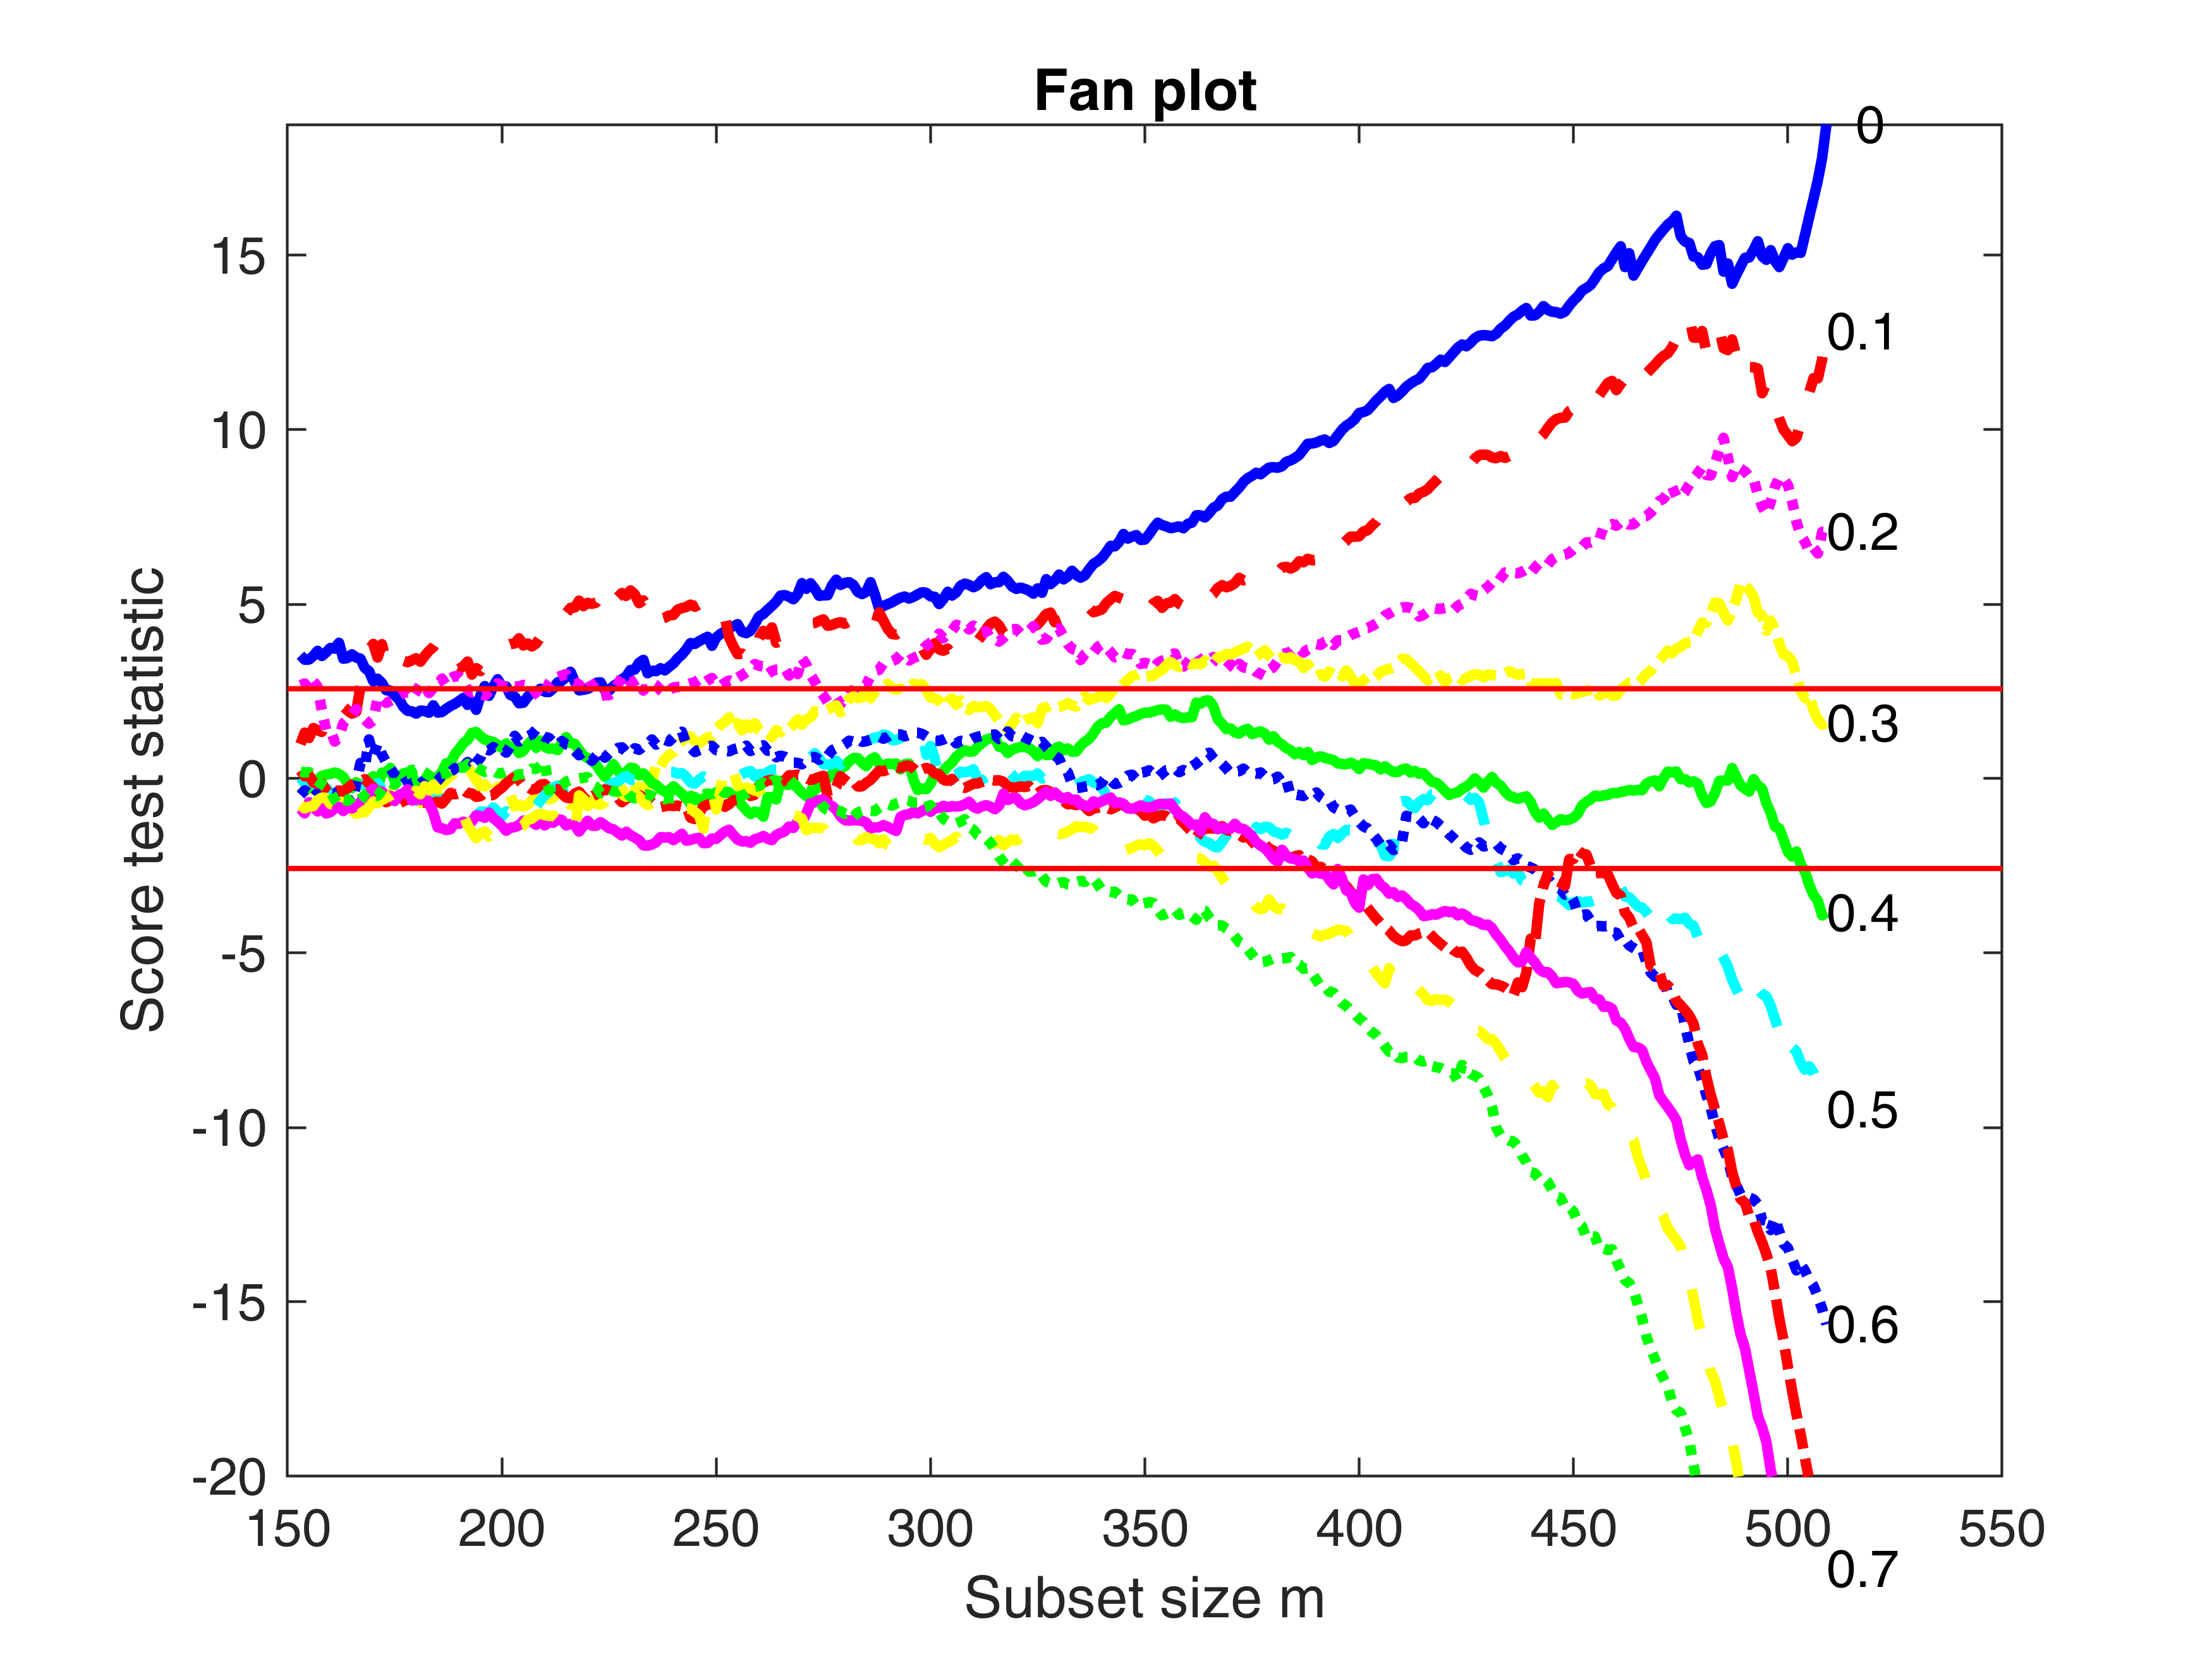

In [2]:
%la=[-1:0.1:1];
la=0:0.1:1;
[outFSRfan]=FSRfan(y,X,'plots',1,'init',round(n*0.3),'nsamp',10000,'la',la,'msg',0);

## Create Figure 6.2

In [3]:
mm=round(n*0.6);
fanplotFS(outFSRfan,'addxline',mm,'xlimx',[150 520])

ans =
     []


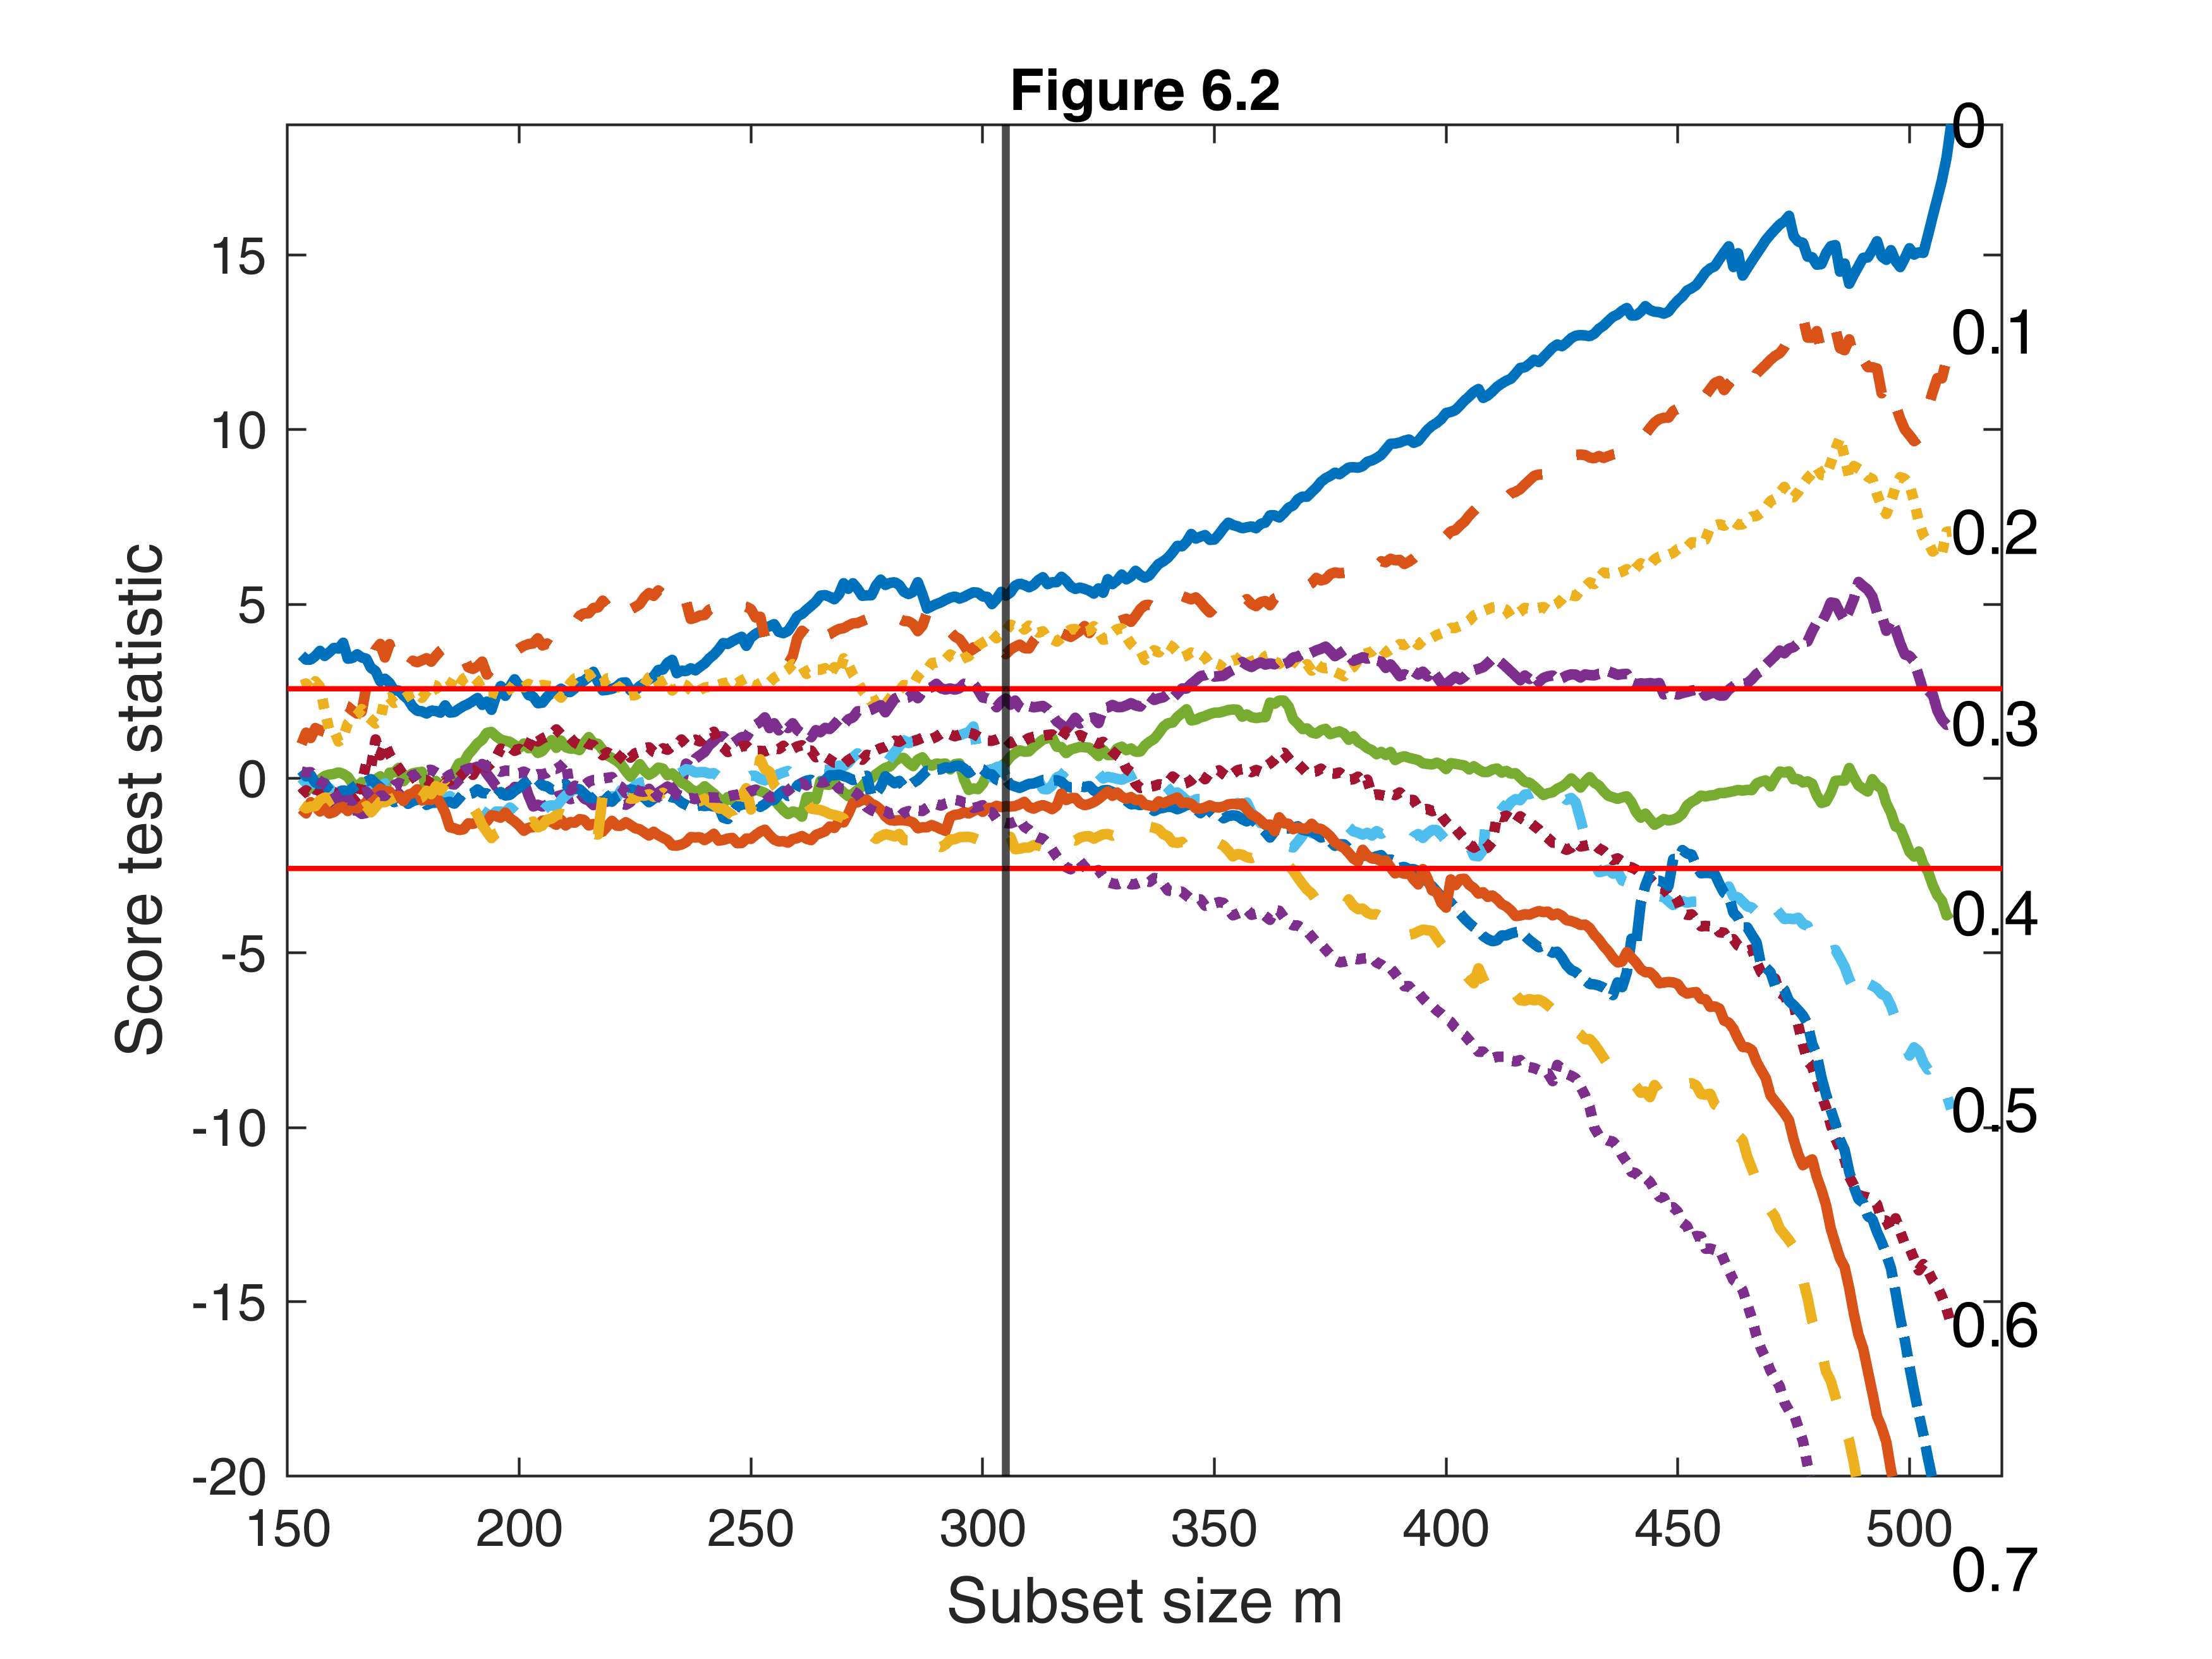

In [4]:
if prin==1
    % print to postscript
    print -depsc L2a.eps
else
    title('Figure 6.2')
    set(gcf,"Name",'Figure 6.2')
end

## Prepare input for Figures 6.3\-6.5

In [5]:
yt=y.^0.4;
[out]=FSR(yt,X,'plots',0,'init',round(n*0.3),'nsamp',10000);

Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=487 because
rmin(487,509)>99.99% and rmin(486,509)>99.99% and rmin(488,509)>99.99%
rmin(487,509)>99.999%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=486
Superimposition stopped because r_{min}(489,492)>99% envelope
 !!!EQ_1!!! \% envelope
Subsample of 491 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=18
Summary of the exceedances
           1          99         999        9999       99999
           0          24          21          20          19

In [6]:
outl=out.ListOut;

[outLXS]=LXS(yt,X,'nsamp',10000);

Total estimated time to complete LMS:  0.14 seconds

In [7]:
[outEDA]=FSReda(yt,X,outLXS.bs);

m=100
m=200
m=300
m=400
m=500

## Create Figure 6.3

mdrplot with last 18 highlighted



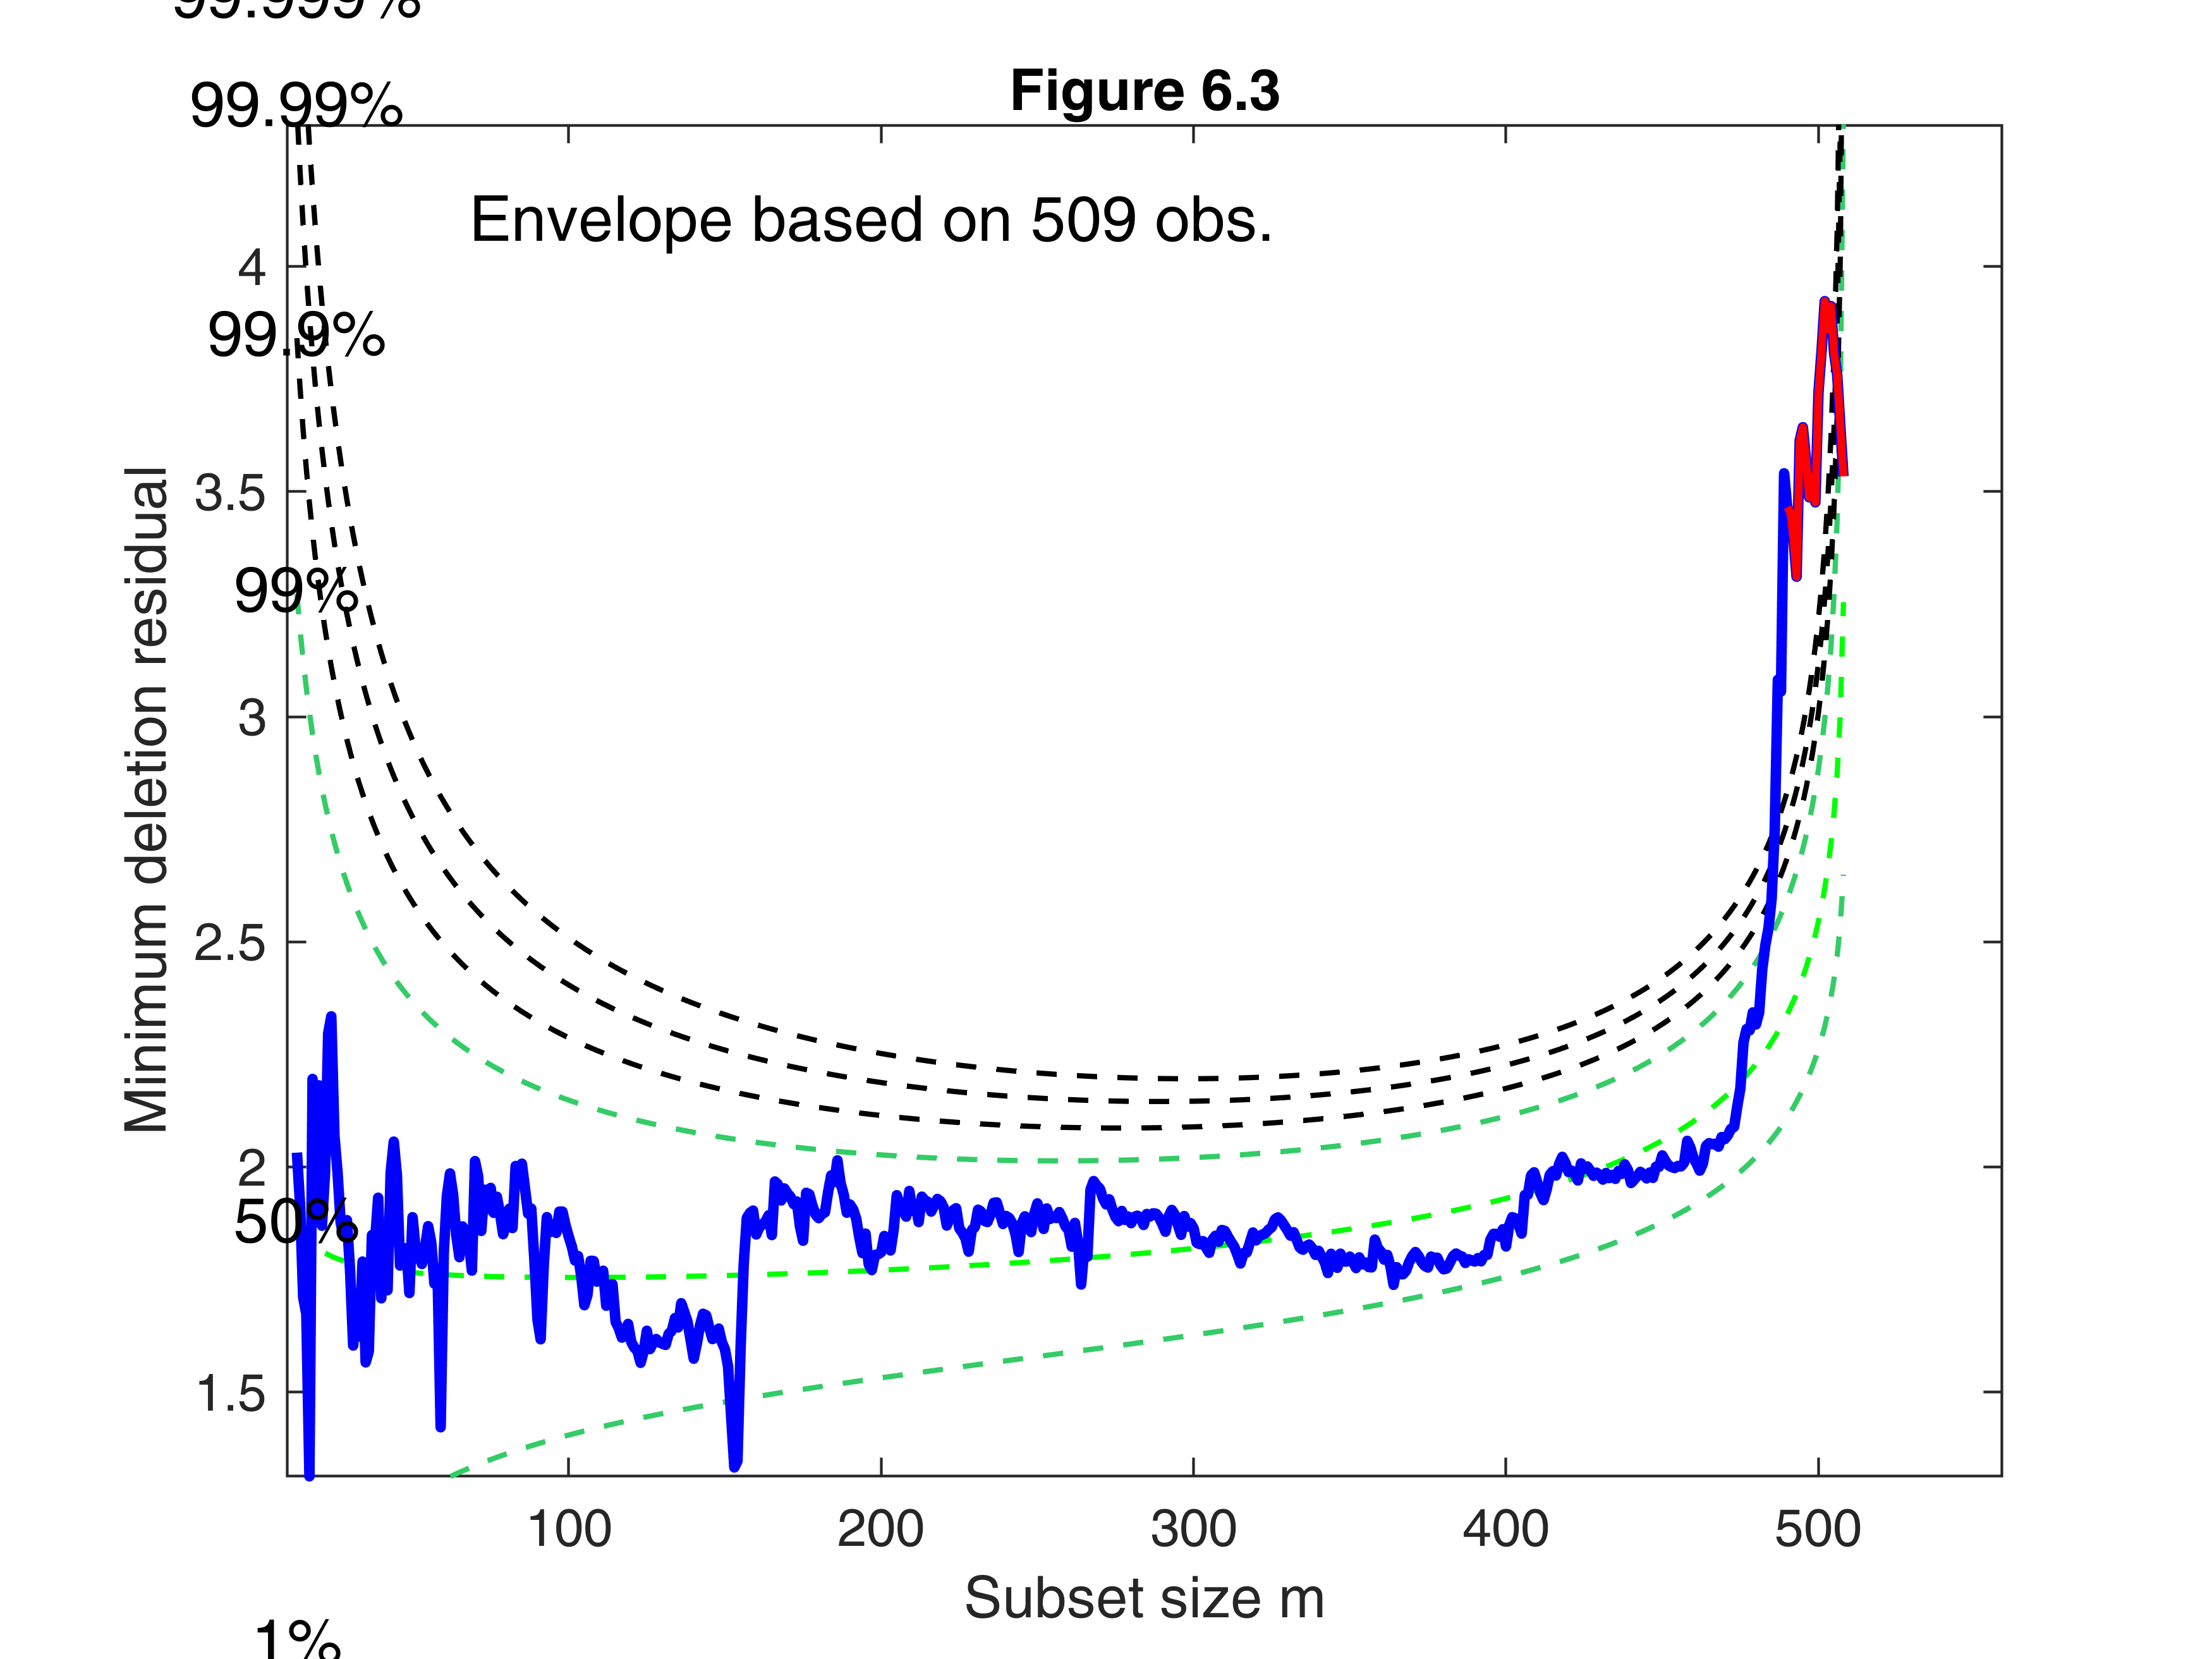

In [8]:
mdrplot(outEDA,'quant',[0.01 0.5 0.99 0.999 0.9999 0.99999]);
hold('on')
rr=18;
mdr=abs(outEDA.mdr(:,1:2));
plot(mdr(end-rr:end,1),mdr(end-rr:end,2),'LineWidth',1.5,'color','r');
if prin==1
    % print to postscript
    print -depsc mdrloyalty04scalev4.eps
else
    title('Figure 6.3')
    set(gcf,"Name",'Figure 6.3')
end

## Create Figure 6.4

resfwdplot with outliers highlighted Monitoring scaled residuals with all default parameters



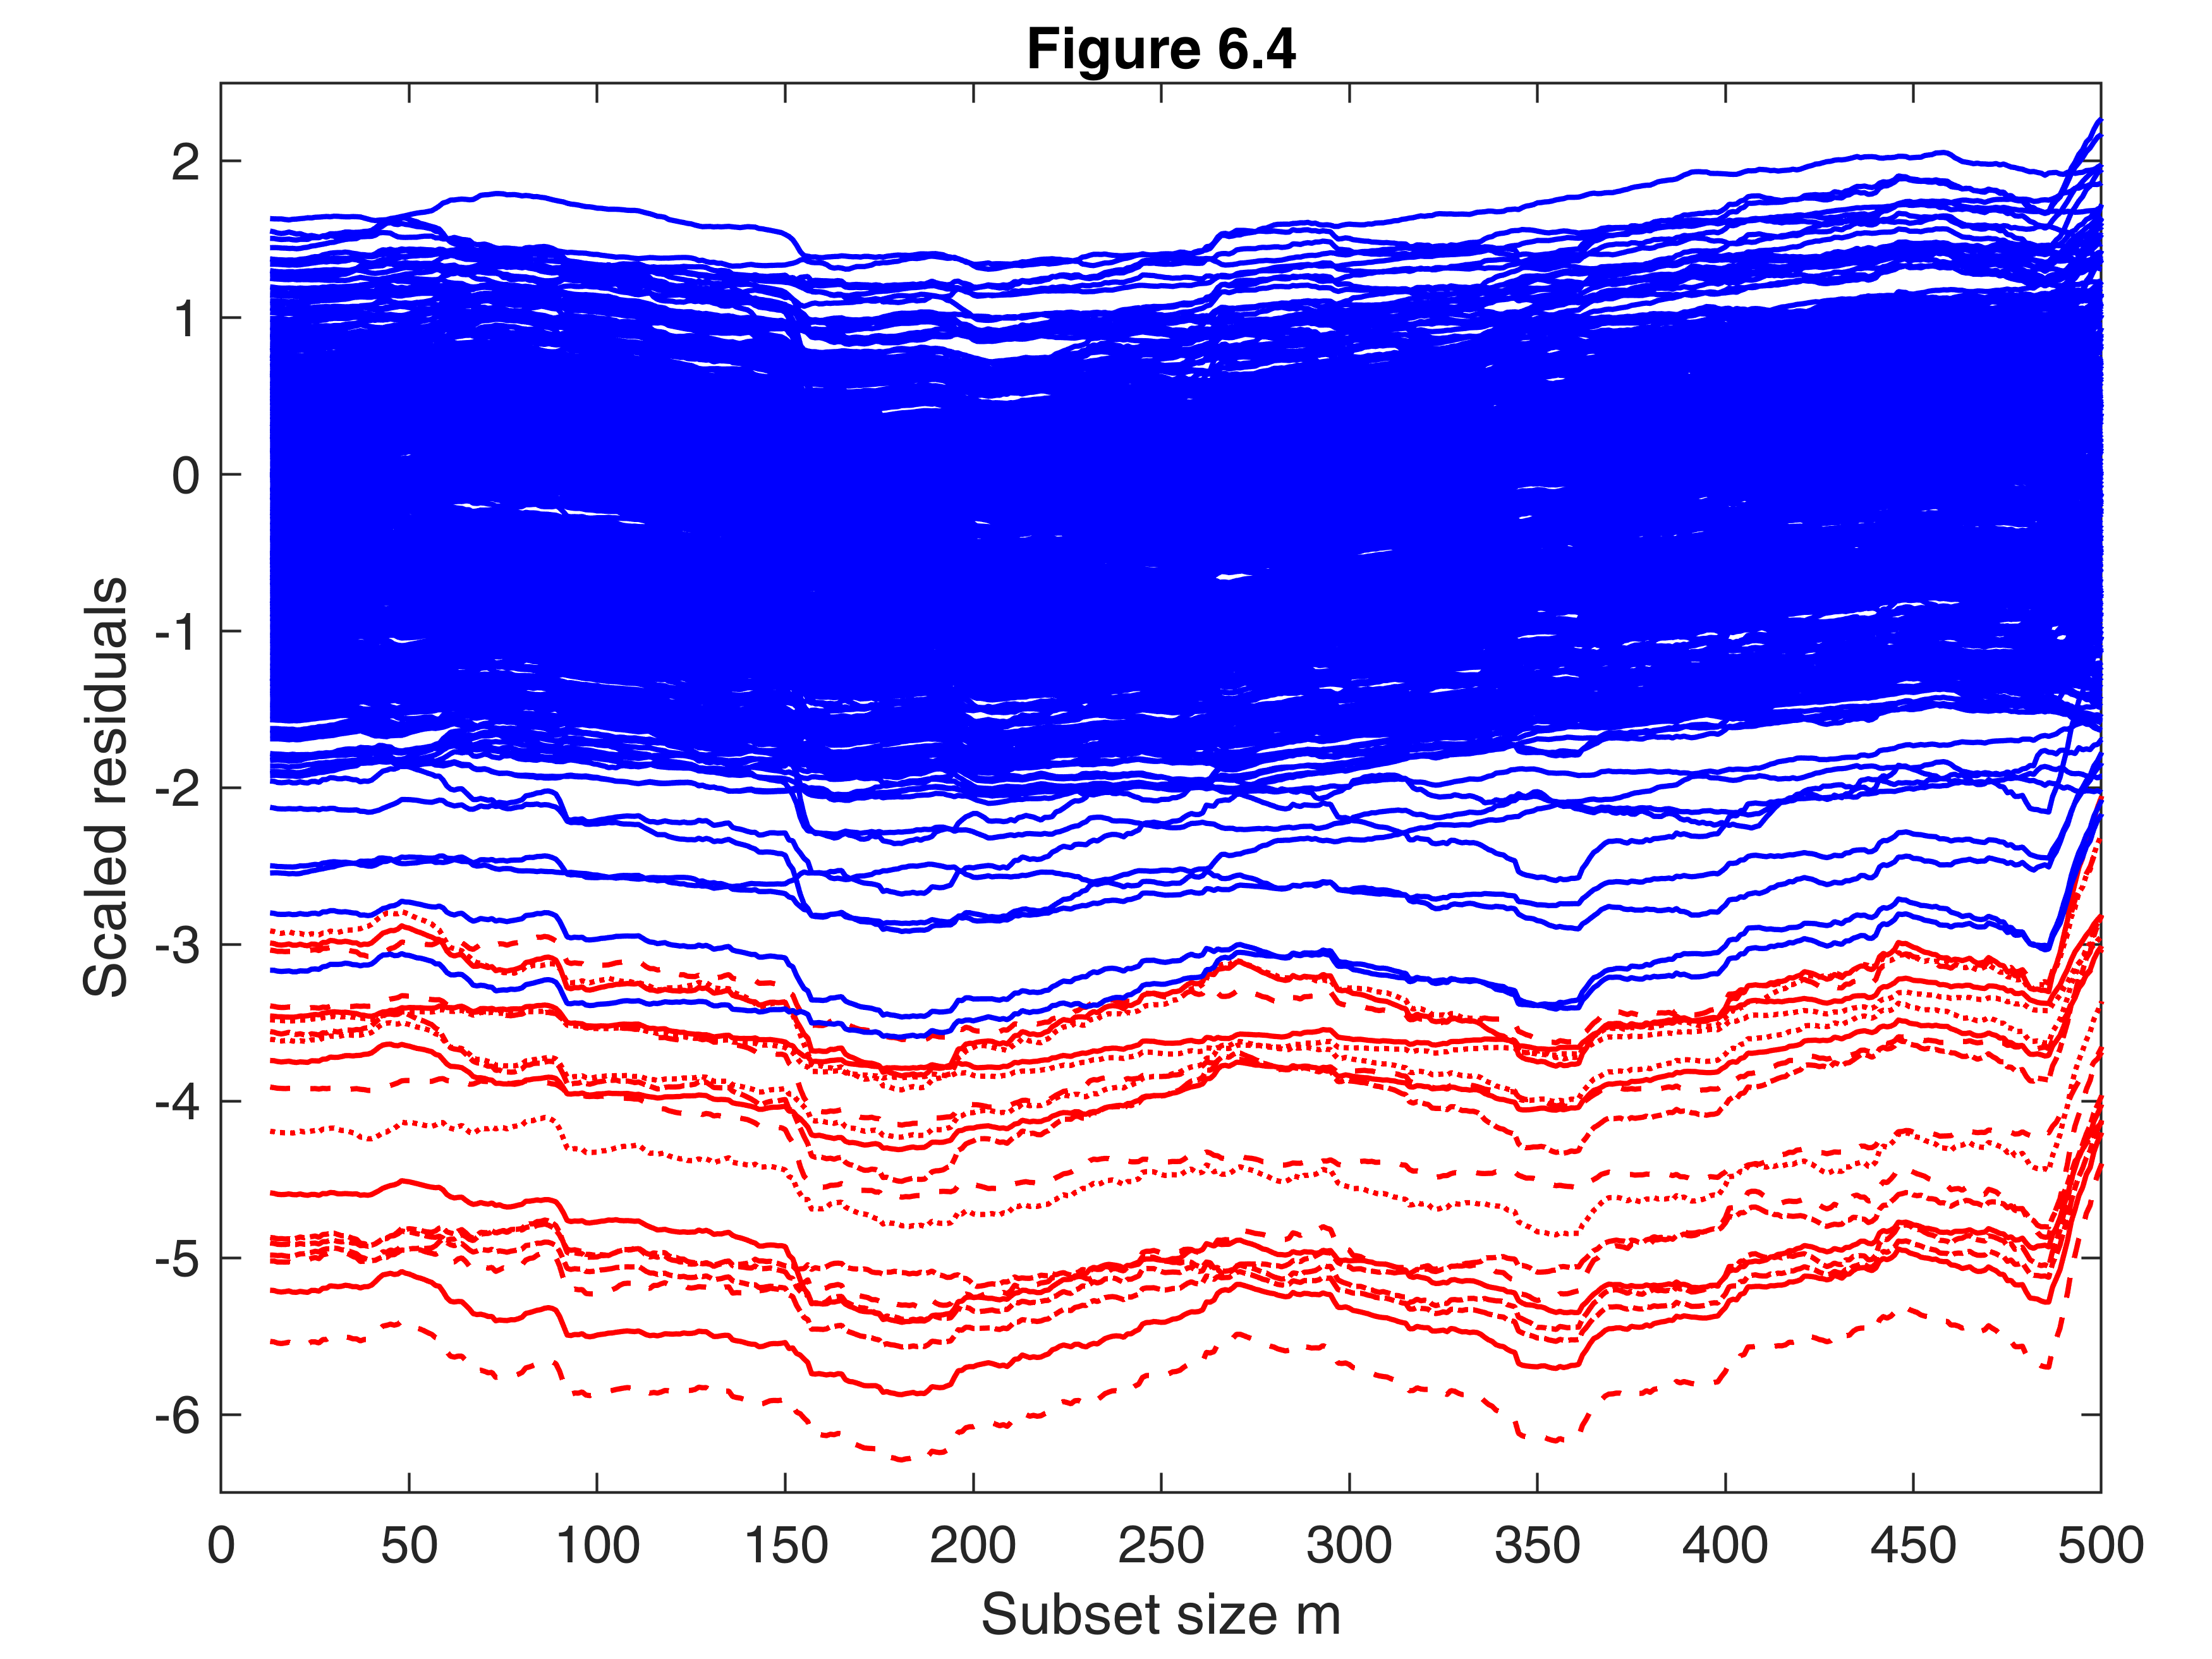

In [9]:
standard=struct;
standard.xlim=[0,500];
standard.ylim=[-6.5, 2.5];
fground=struct;
fground.funit=outl;
fground.Color={'r'};
fground.flabstep='';
bground='';
resfwdplot(outEDA,'fground',fground,'bground',bground, ...
    'standard', standard,'datatooltip','');
if prin==1
    % print to postscript
    print -depsc L4.eps
else
    title('Figure 6.4')
    set(gcf,"Name",'Figure 6.4')
end

## Create Figure 6.5:

Transformed loyalty cards data: scatterplot against x1. The 18 outliers detected plotted as red crosses



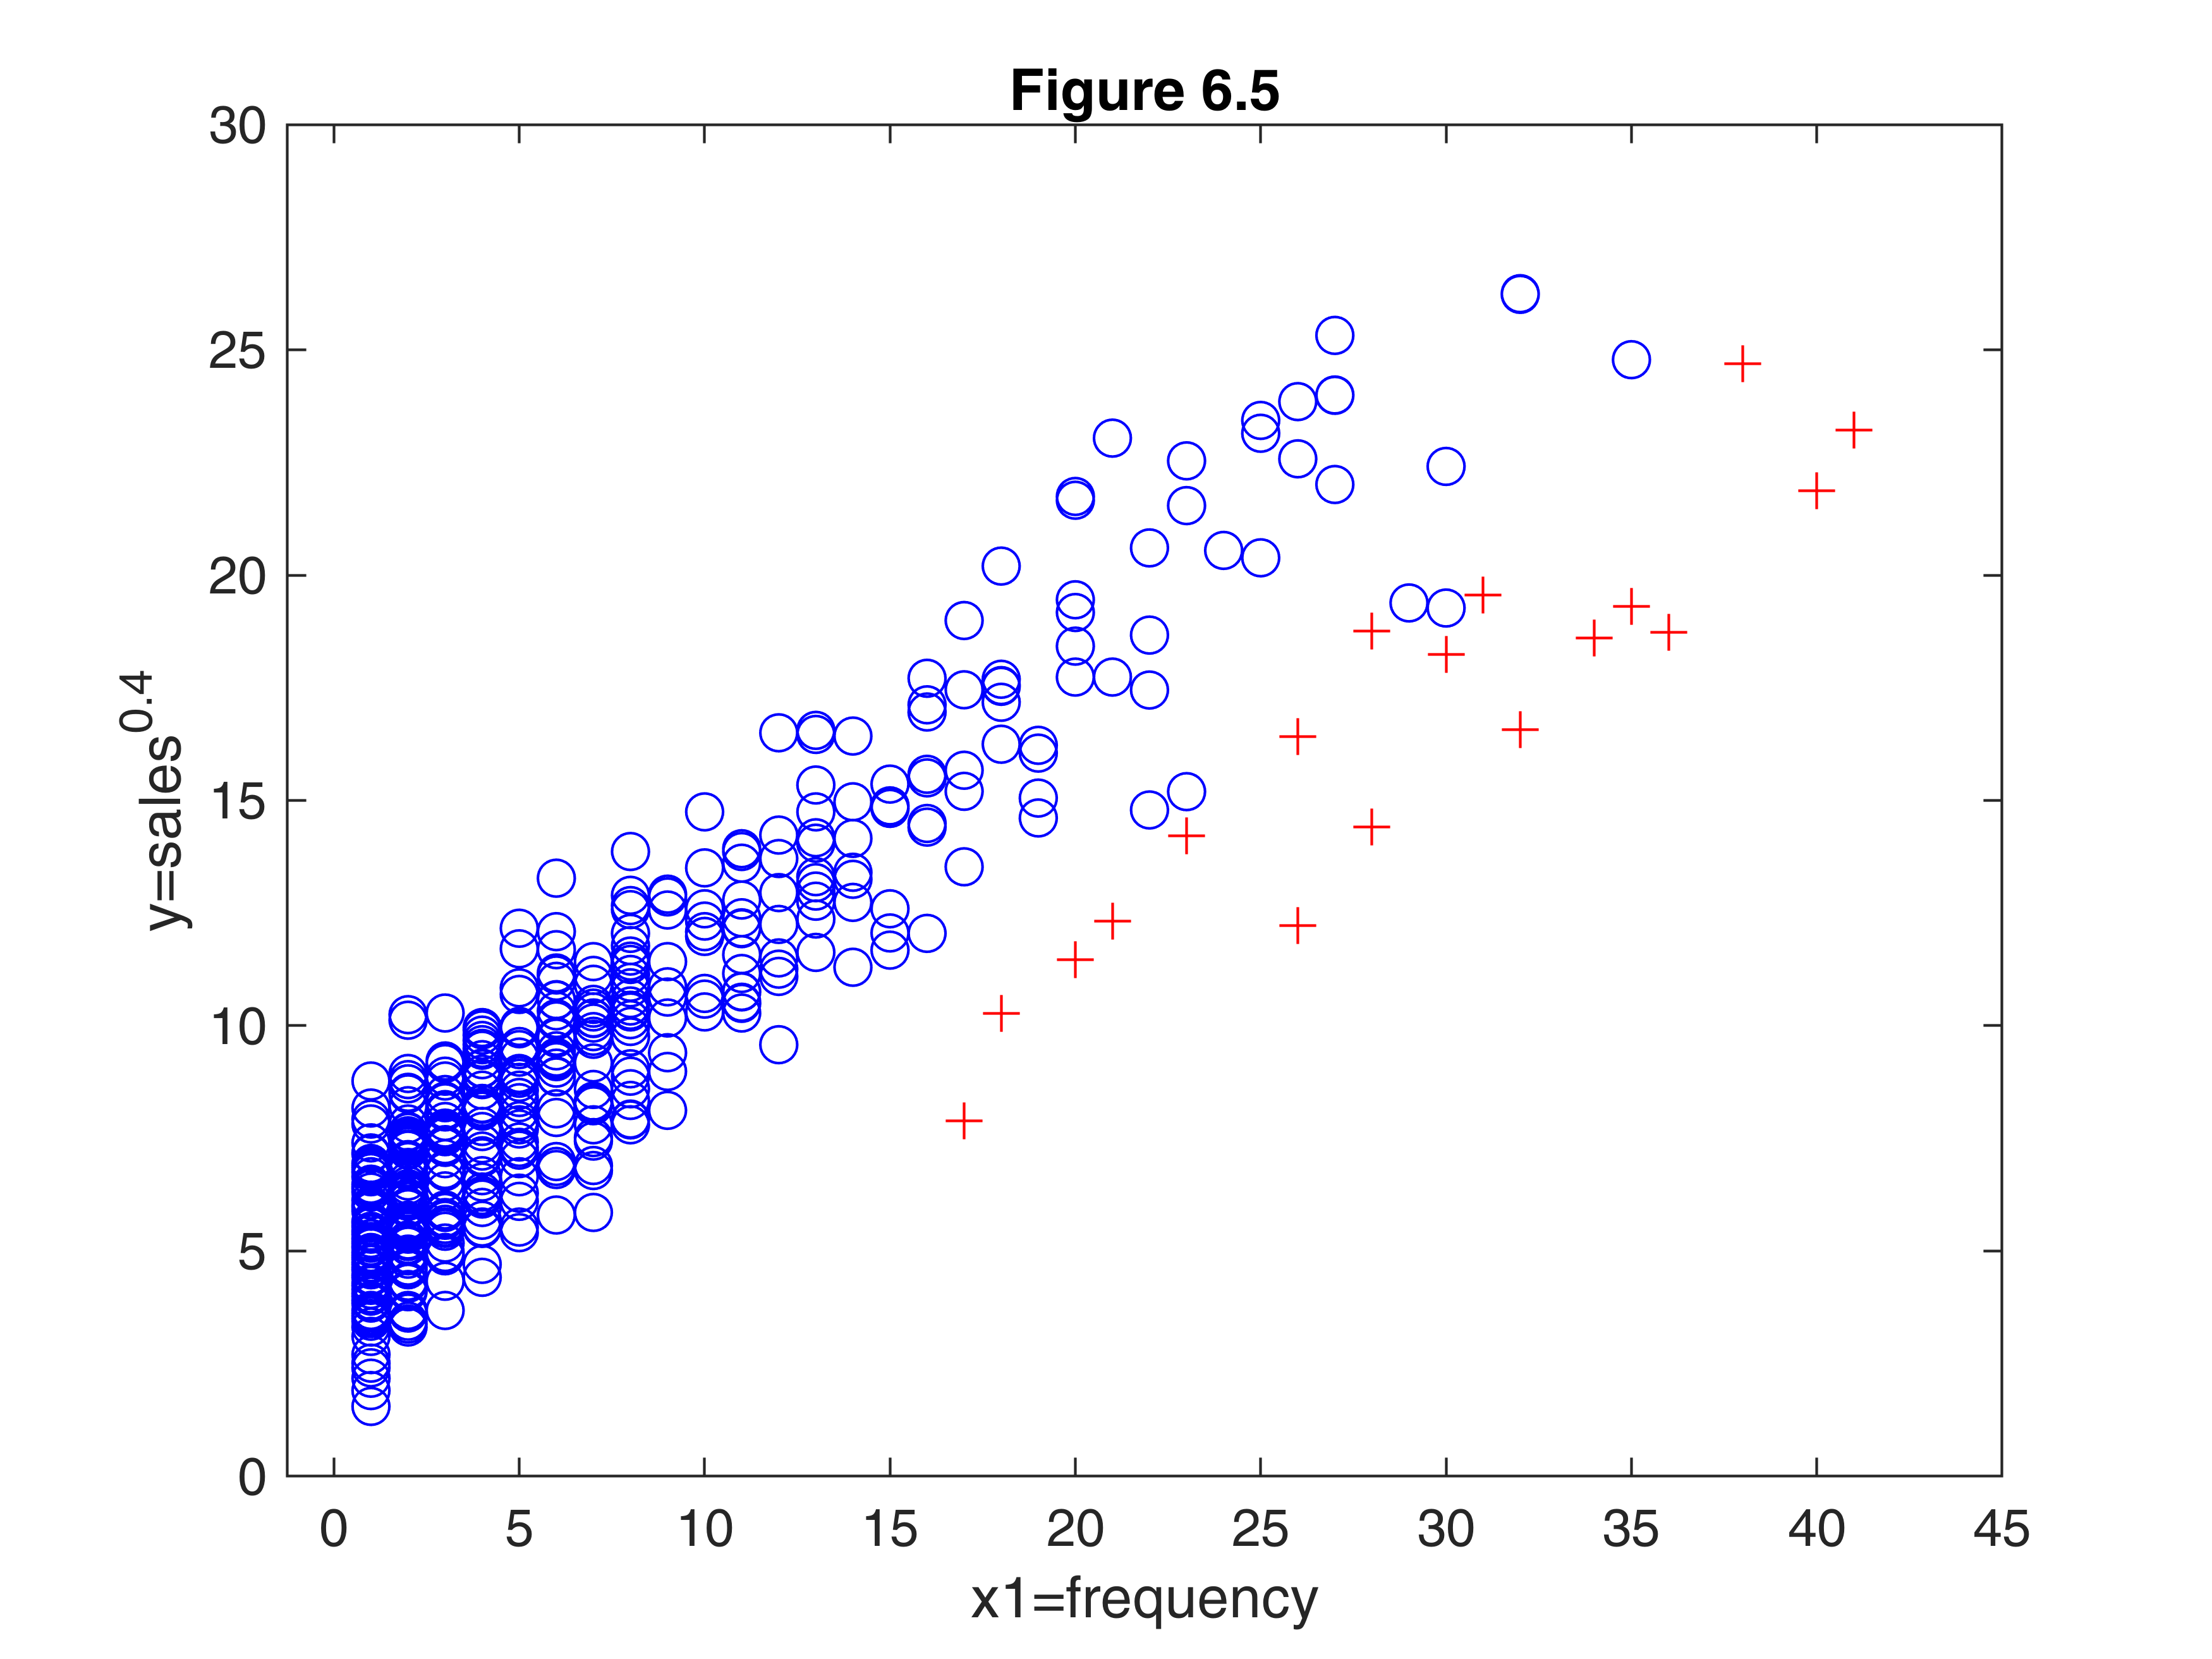

In [10]:
figure
group=ones(length(y),1);
group(outl)=2;
gscatter(X(:,1),yt,group,'br','o+',7)
xlabel('x1=frequency')

ylabel("y=sales^{0.4}")
legend off
title('Figure 6.5')
set(gcf,"Name",'Figure 6.5')

## Create Figure 6.6:

Monitoring of beta1



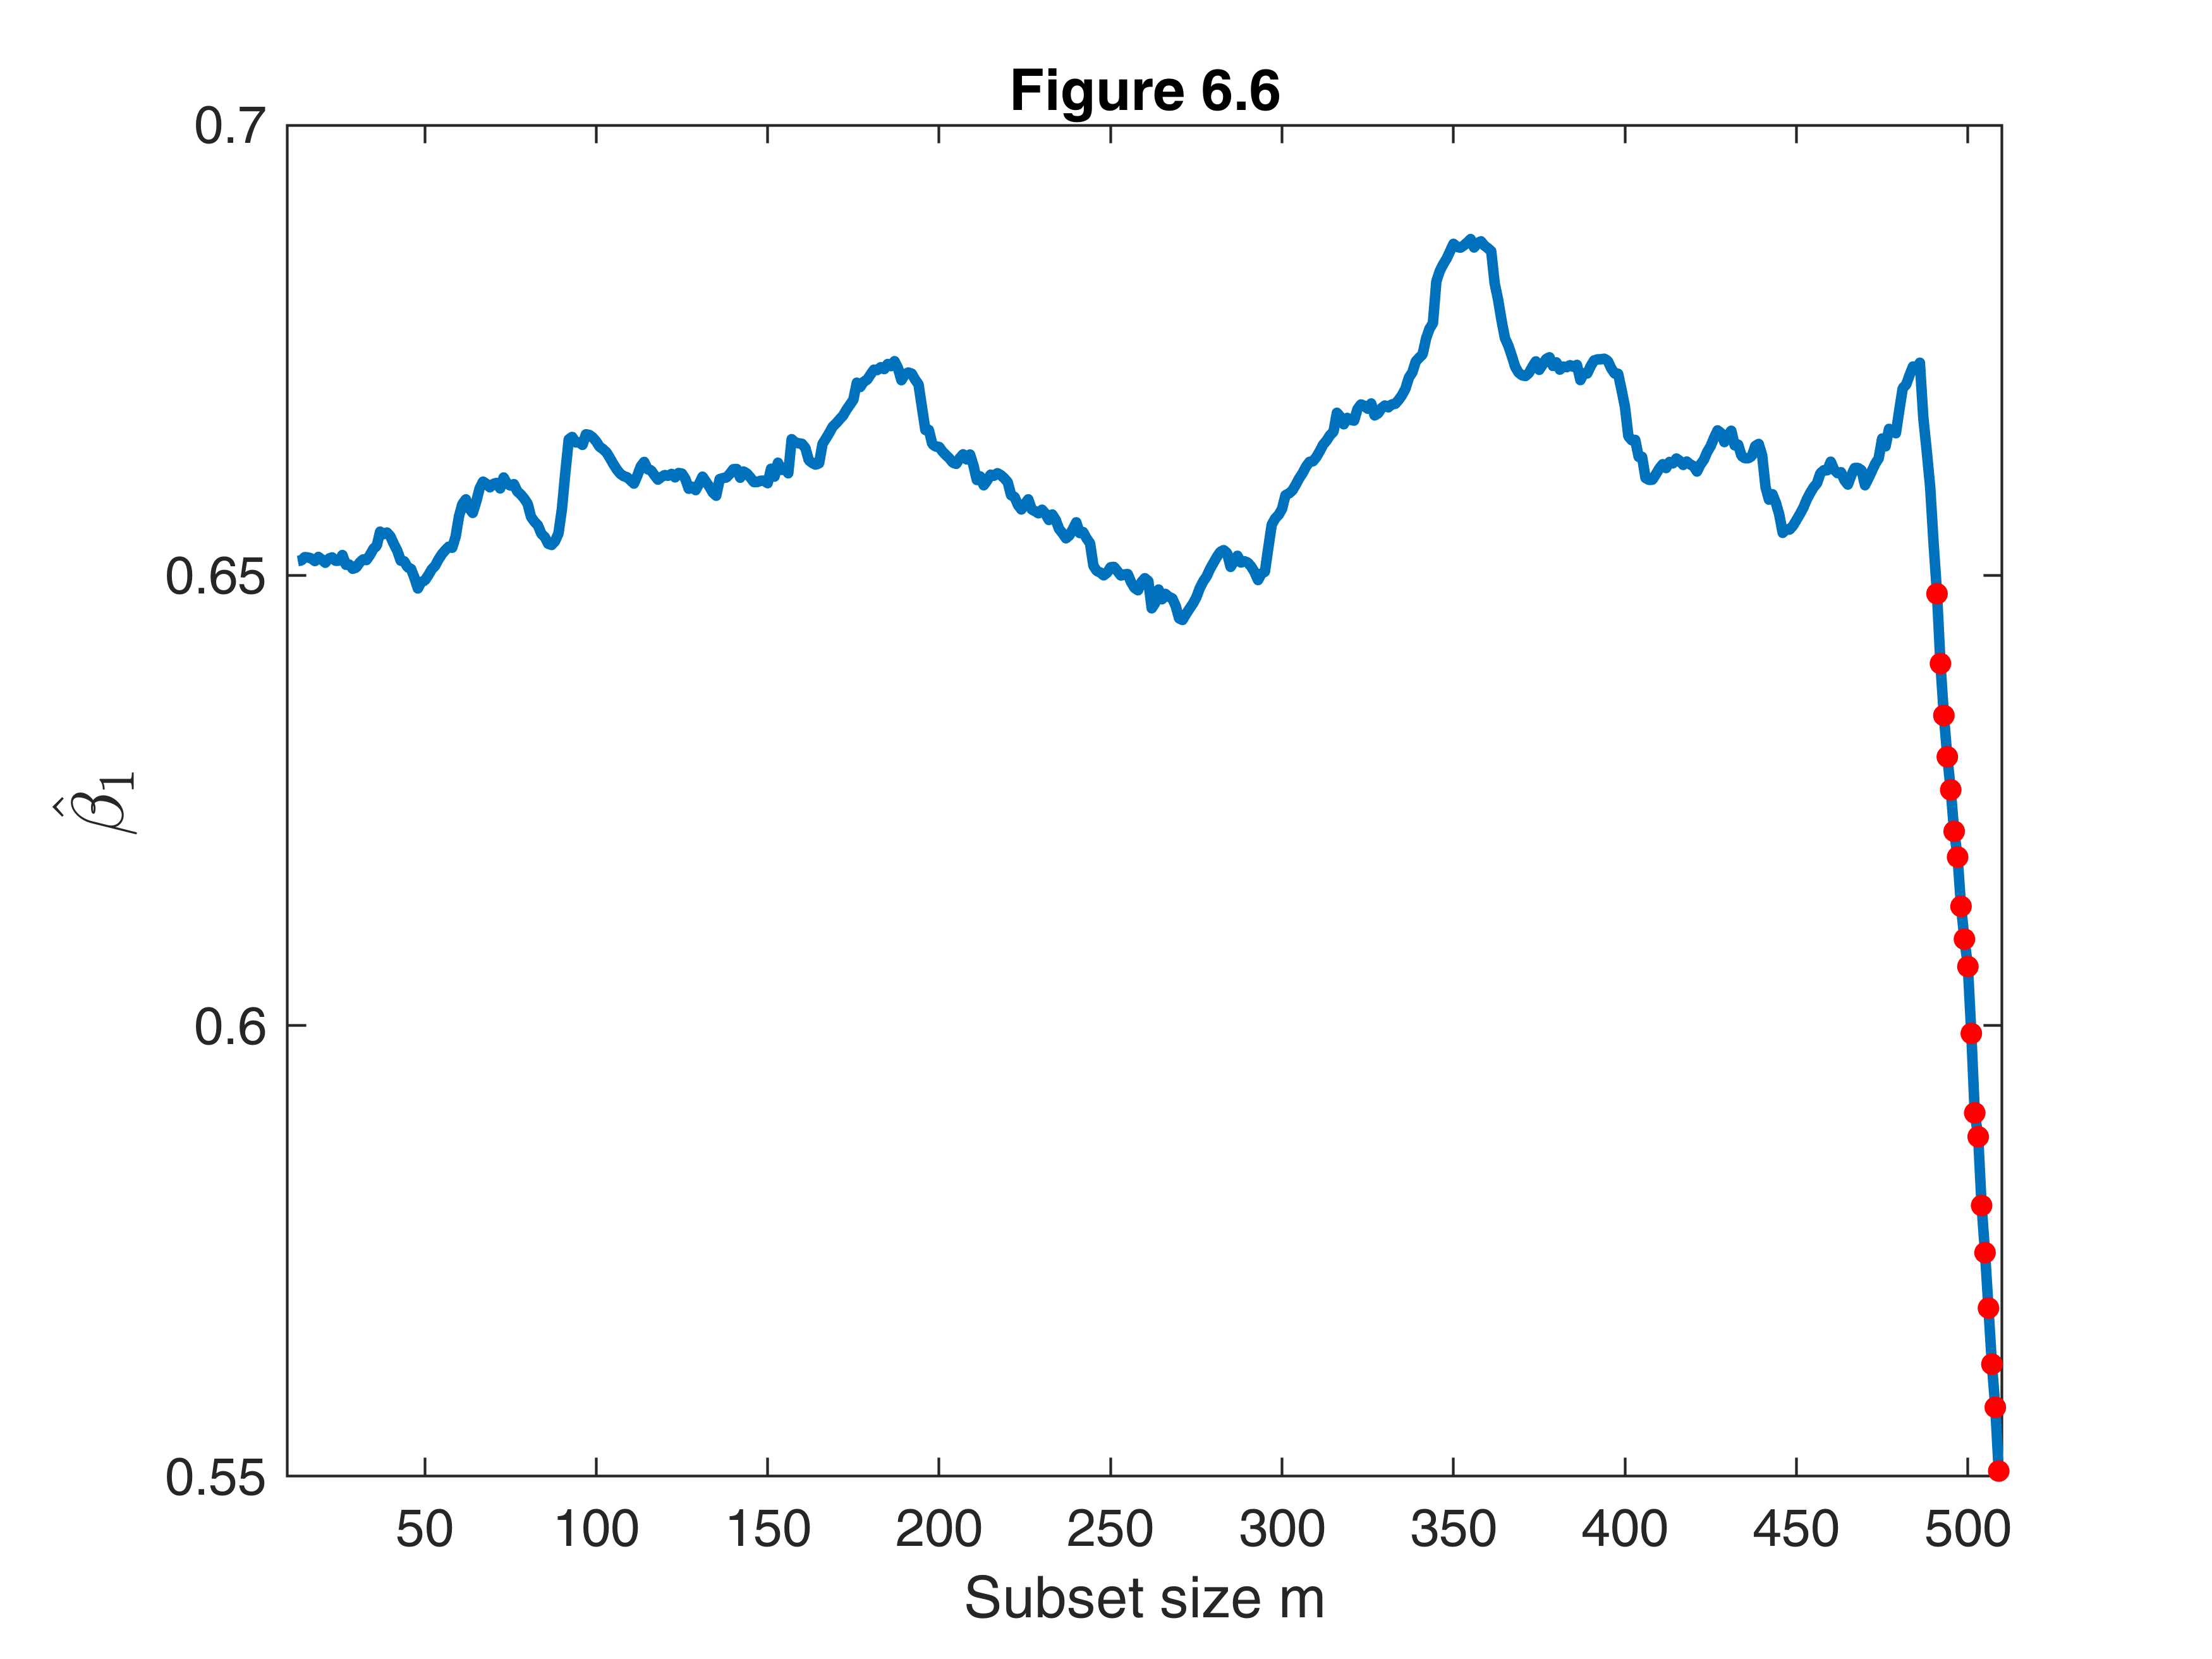

In [11]:
figure
j=3;
plot(outEDA.Bols(:,1),outEDA.Bols(:,3),'LineWidth',2)
xlim([10 510])
hold('on')
plot(outEDA.Bols(end-rr:end,1), outEDA.Bols(end-rr:end,3),'.','color','r', 'MarkerSize',14);
xlabel('Subset size m');
ylabel(' $\hat \beta_{1}$ ','Interpreter','Latex','FontSize',14)
if prin==1
    print -depsc L6.eps;
else
    title('Figure 6.6')
    set(gcf,"Name",'Figure 6.6')
end

## Figure 6.15 and Figure 6.16

See file LoyaltyCardsBICplots.m


In [12]:
%InsideREADME